In [1]:
import IPython
import pandas as pd
import keras
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, TimeDistributed, Activation
from keras.layers import LSTM
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
#from kerasify import export_model
from keras.models import model_from_json
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import scikitplot as skplt

/home/amritpal/anaconda3/envs/tensorflow_pose/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
!pwd

/home/amritpal/Documents/Deep Learning/keras jupyter


In [4]:
path = Path('/home/amritpal/Documents/Deep Learning/keras jupyter')

In [5]:
timesteps = 5
epochs = 300
batch_size = 32
_dropout = 0.1
_activation='relu'
_optimizer='Adam'
class_names = ["sitting","standing"]
X_vector_dim = 17 # number of features or columns (pose)
samples_path = path/'Data/train_data/pose_raw_0.txt'
labels_path  = path/'Data/train_data/label_pose_raw_0.txt'
model_path   = path/'Data/train_data/pose.model'
json_model_path = path/'Data/train_data/pose_model.json'
model_weights_path = path/'Data/train_data/pose_model.h5'

In [6]:
X = np.loadtxt(samples_path, dtype='float')
y = np.loadtxt(labels_path)

In [18]:
print(X.shape)
print(y.shape)

(1113, 17)
(1113,)


In [26]:
# X_3D = np.reshape(X, (311, 5, 36))

In [27]:
# print(X_3D.shape)

(311, 5, 36)


### np.arange

np.arange give us the results as shown below.
We can use np.arange function to get the index vector which can be used in getting values or adding values to a np array

In [8]:
print(np.arange(3))
print(np.arange(1,4))
print(np.arange(0,9,2))

[0 1 2]
[1 2 3]
[0 2 4 6 8]


In [9]:
b = np.zeros((3,4))
print(np.arange(3))

a = [1, 0, 3]
b[np.arange(3), a]  = 1
# this will add 1 at (0, 1), (1, 0), (2, 3)
print(b)
print(b[np.arange(3), 0])
print(b[np.arange(3), 1])
print(b[np.arange(3), 2])
print(b[np.arange(3), 3])

[0 1 2]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
[0. 1. 0.]
[1. 0. 0.]
[0. 0. 0.]
[0. 0. 1.]


In [12]:
print(y)

[1. 1. 1. ... 2. 2. 2.]


In [35]:
def one_hot_encoding(y):
    y = np.asarray(y, dtype=int)
    b = np.zeros((y.size, y.max()+1))
    for i in range(y.size):
        a = int(y[i])
        b[i][a] = 1
    return b

In [36]:
b = one_hot_encoding(y)
print(b)
print(b.shape)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(1113, 3)


In [37]:
y_vector_dim = b.shape[1]
print(y_vector_dim)

3


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, b, test_size=0.33, random_state = 42)

In [39]:
print(X_train)
print(X_train.shape, " ", X_test.shape, " ", y_train.shape, " ", y_test.shape)

[[0.06580623 0.07193681 0.14170747 ... 0.01351351 0.02989525 0.70132459]
 [0.10095465 0.17480827 0.33351946 ... 0.04050563 0.080096   0.07445621]
 [0.10061539 0.11555556 0.24528391 ... 0.01885618 0.02027588 0.03349959]
 ...
 [0.04106776 0.04085593 0.46872072 ... 0.01453803 0.46872072 0.46872072]
 [0.0132787  0.01877891 0.04450002 ... 0.00582309 0.0082351  0.01073725]
 [0.04229512 0.62671876 0.62671876 ... 0.0060241  0.00888866 0.00326797]]
(745, 17)   (368, 17)   (745, 3)   (368, 3)


In [40]:
input_shape = (int(X_train.shape[1]),)
# input_shape = (int(X_train.shape[1]), int(X_train.shape[2]))
input_shape


(17,)

In [41]:
print("Model Parameters:")
print( "input_shape     : ", input_shape)
print( "X_vector_dim    : ", X_vector_dim)
print( "y_vector_dim    : ", y_vector_dim)

Model Parameters:
input_shape     :  (17,)
X_vector_dim    :  17
y_vector_dim    :  3


In [44]:
model = Sequential([
    Dense(X_vector_dim, activation = _activation, input_shape = (17,)),
    Dropout(_dropout),  
    # this is to prevent overfitting which is what fraction of neurons to drop.
    Dense(X_vector_dim*2, activation = _activation),
    Dropout(_dropout),
    Dense(int(X_vector_dim/2), activation = _activation),
    Dropout(_dropout),
    Dense(int(X_vector_dim/4), activation = _activation),
    Dropout(_dropout),
    LSTM(int(X_vector_dim/4), dropout=_dropout, recurrent_dropout=_dropout),
    Dense(y_vector_dim, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = _optimizer, metrics=['accuracy'])
model.summary()

ValueError: Input 0 is incompatible with layer lstm_9: expected ndim=3, found ndim=2

In [37]:
# Callback class to visialize training progress
class TrainingVisualizer(keras.callbacks.History):
    def on_epoch_end(self, epoch, logs={}):
        super(TrainingVisualizer, self).on_epoch_end(epoch, logs)
        IPython.display.clear_output(wait=True)
        axes = pd.DataFrame(self.history).plot()
        axes.axvline(x=max((val_acc, i) for i, val_acc in enumerate(self.history['val_acc']))[1])
        plt.show()

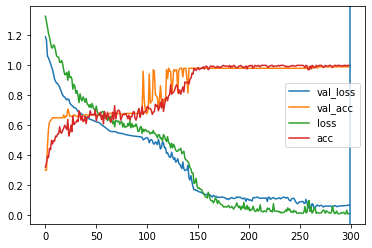

In [38]:
model.fit(X_train, 
      y_train, 
      batch_size=batch_size, 
      epochs=epochs, 
      validation_data=(X_test, y_test), callbacks=[TrainingVisualizer()]
     )

In [40]:
score, accuracy = model.evaluate(X_test, y_test,
                                 batch_size=batch_size)
print(score, accuracy)

103/103 [==============================] - 0s 350us/step
0.06855731588128267 0.9902912621359223


In [59]:
y_pred = model.predict_classes(X_test)
print(y_test.shape)
y_test_raw = []
for i in range(y_test.shape[0]):
    for j in range(y_test.shape[1]):
        if(y_test[i][j] == 1):
            y_test_raw.append(j)
print(len(y_test_raw))
print(y_test_raw)

(103, 4)
103
[3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 3, 3, 3, 3, 1, 2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 3, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 3, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3]


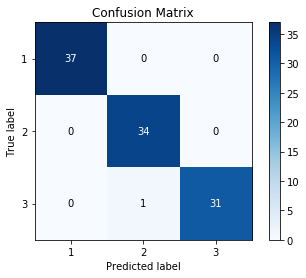

In [60]:
skplt.metrics.plot_confusion_matrix(y_test_raw, y_pred)